# Просмотр czi файлов

In [1]:
import matplotlib.pyplot as plt
from pylibCZIrw import czi as pyczi
import cv2
import numpy as np
from skimage import io, morphology

{'T': (0, 1), 'Z': (0, 30), 'C': (0, 2), 'B': (0, 1), 'X': (0, 1024), 'Y': (0, 1024)}
30
Layer 0


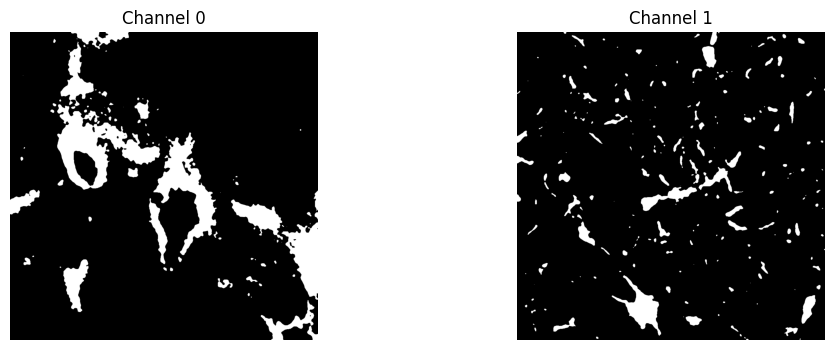

Layer 1


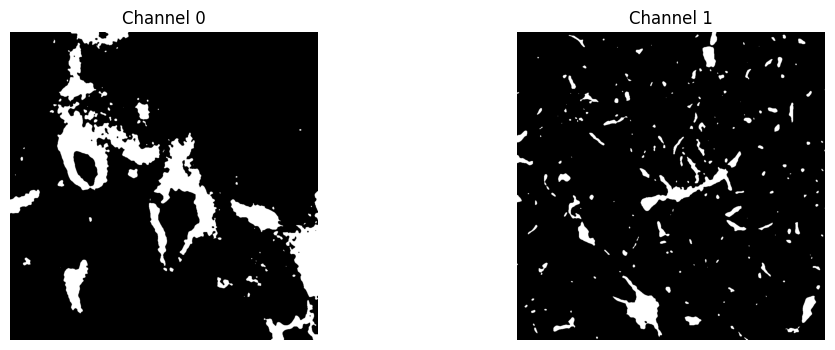

Layer 2


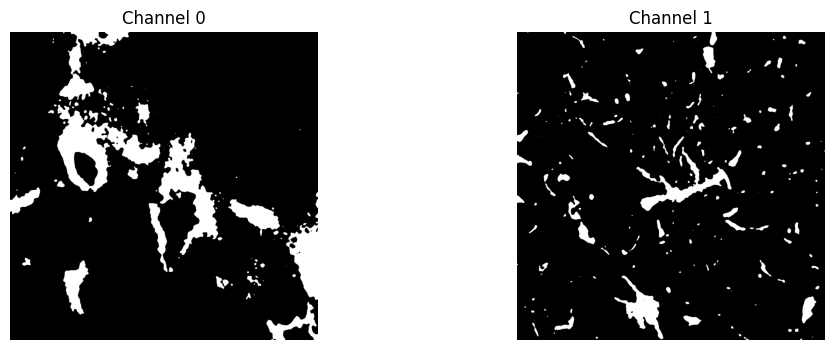

Layer 3


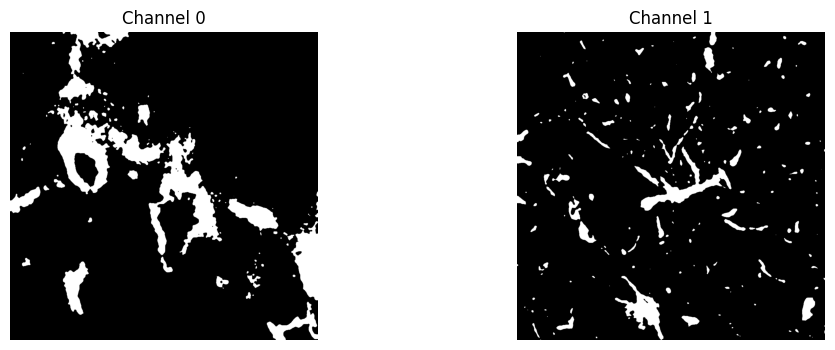

Layer 4


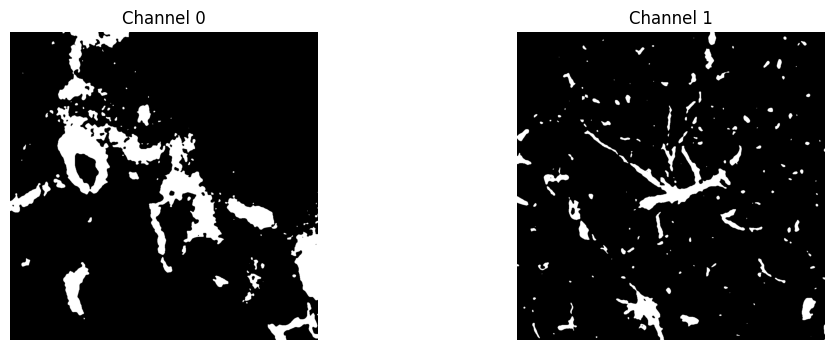

Layer 5


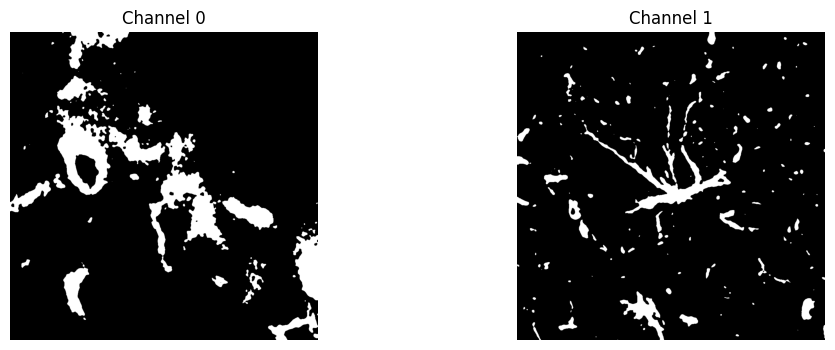

Layer 6


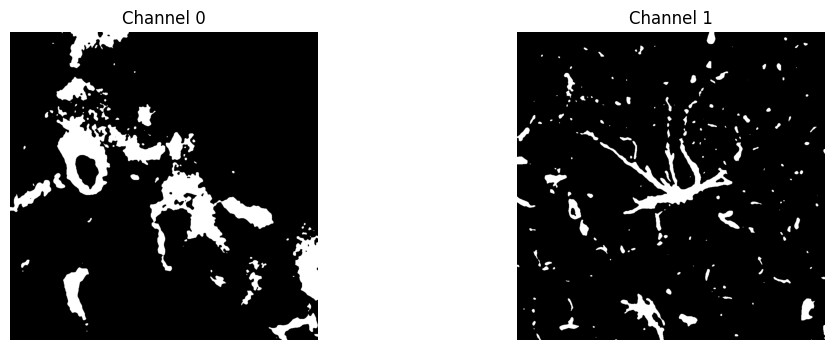

Layer 7


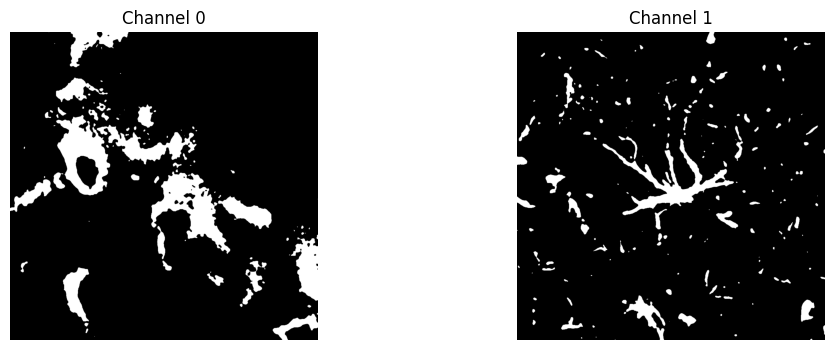

Layer 8


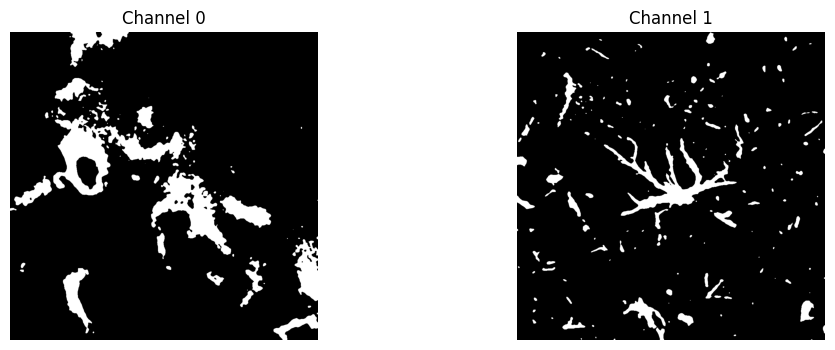

Layer 9


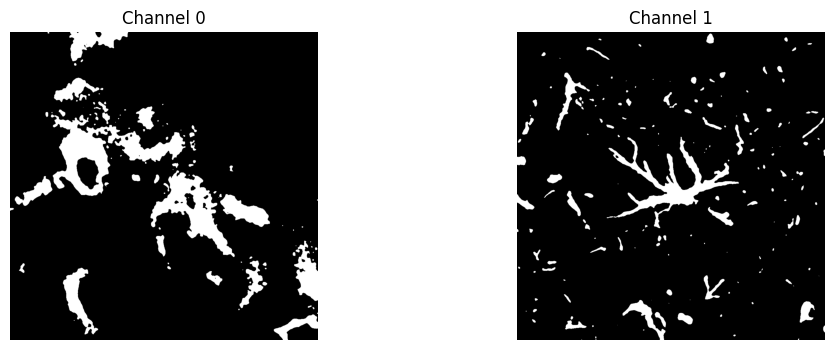

Layer 10


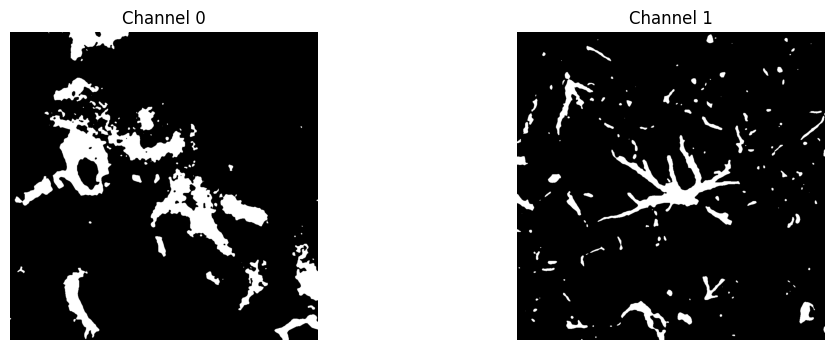

Layer 11


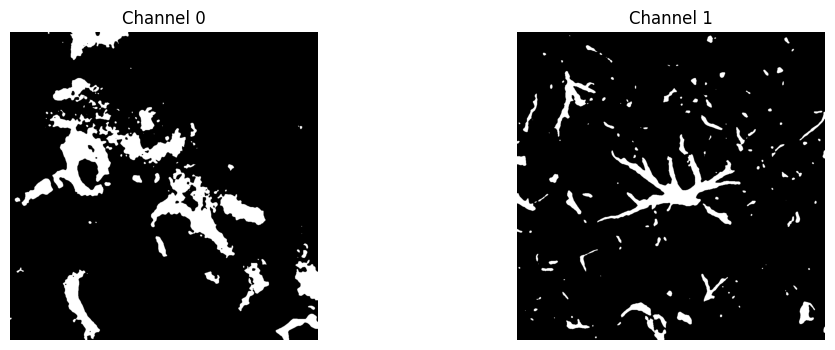

Layer 12


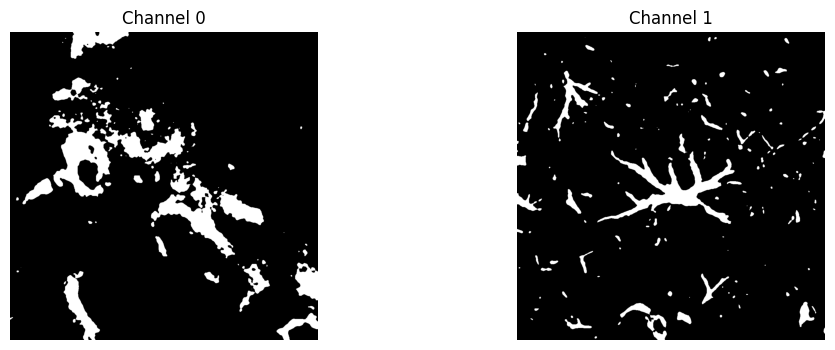

Layer 13


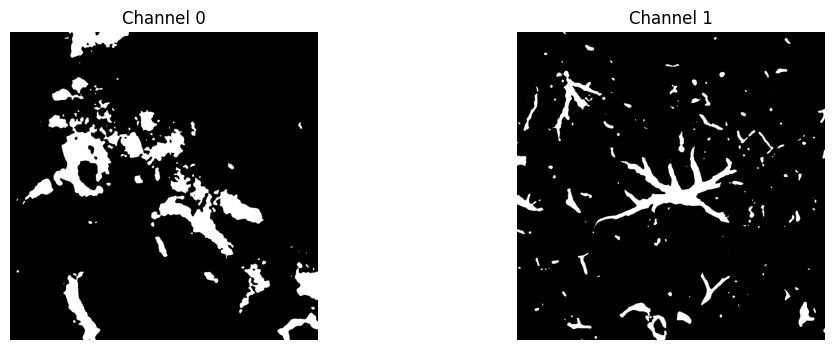

Layer 14


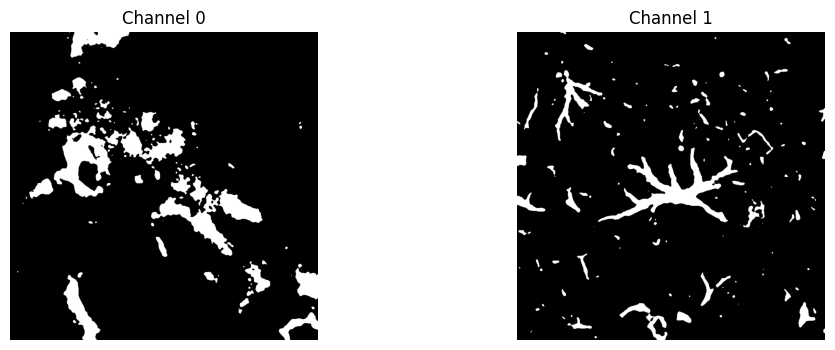

Layer 15


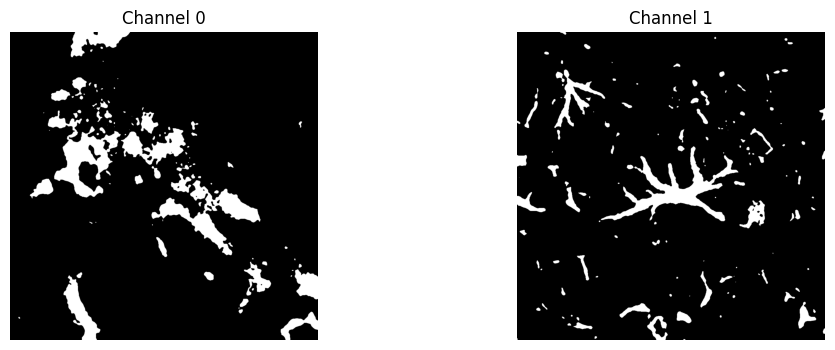

Layer 16


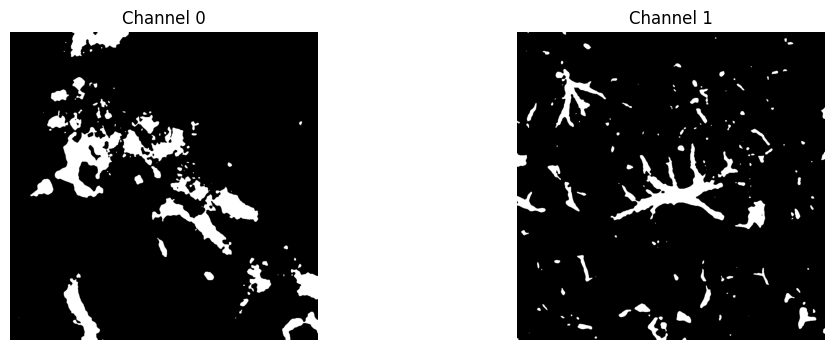

Layer 17


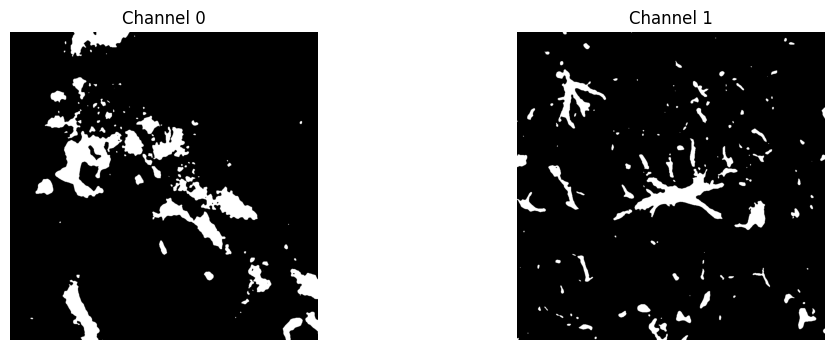

Layer 18


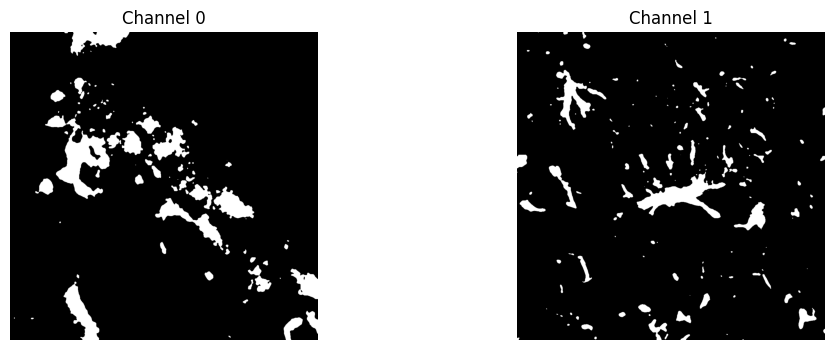

Layer 19


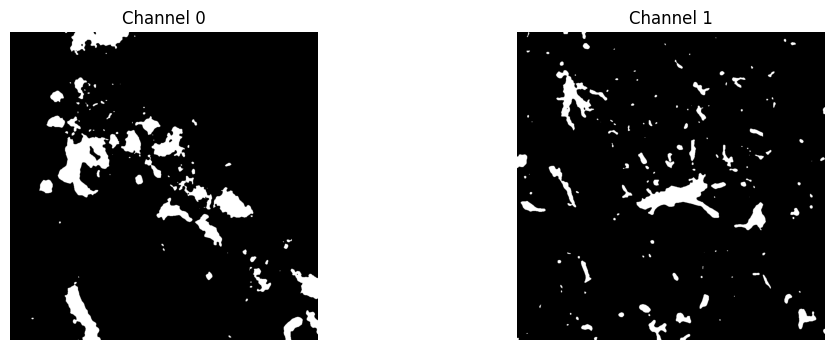

Layer 20


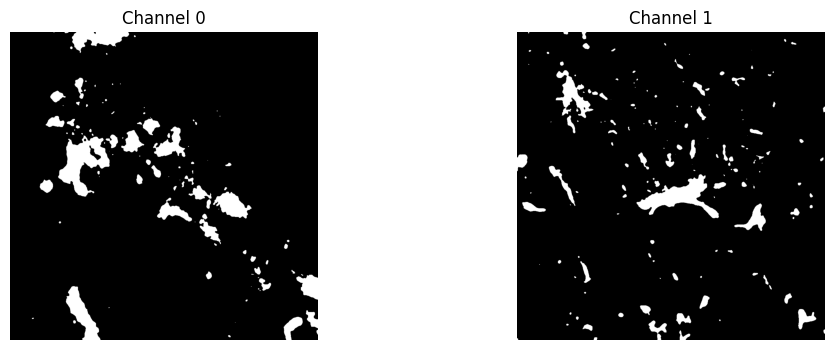

Layer 21


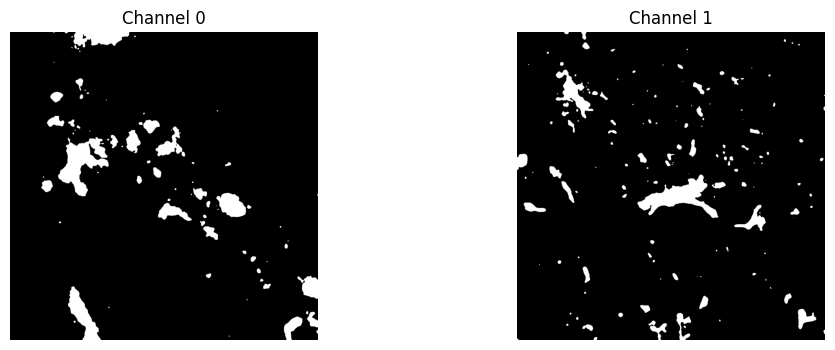

Layer 22


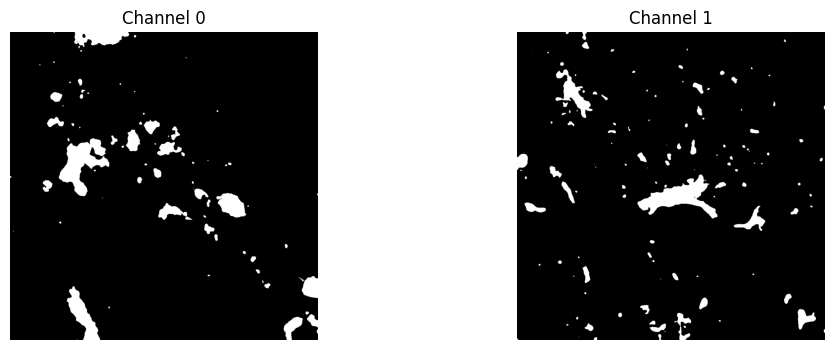

Layer 23


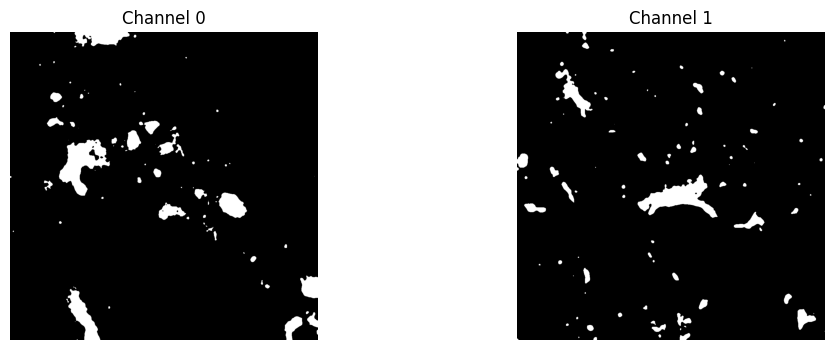

Layer 24


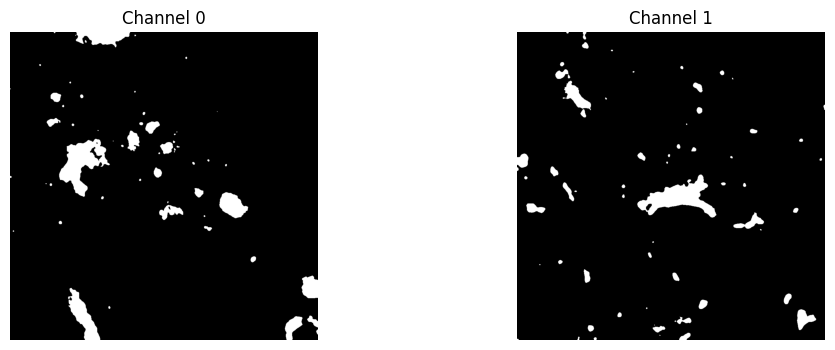

Layer 25


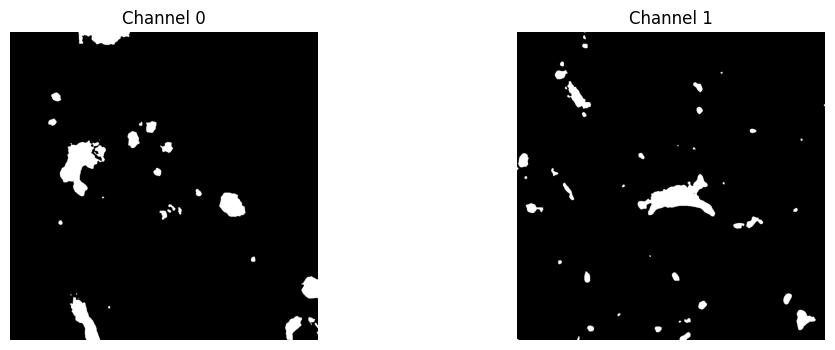

Layer 26


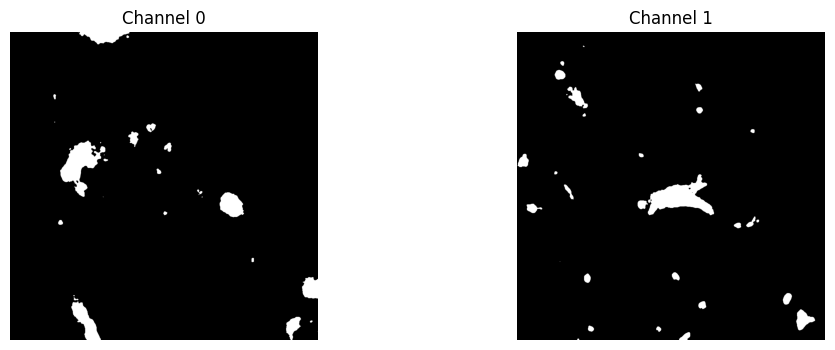

Layer 27


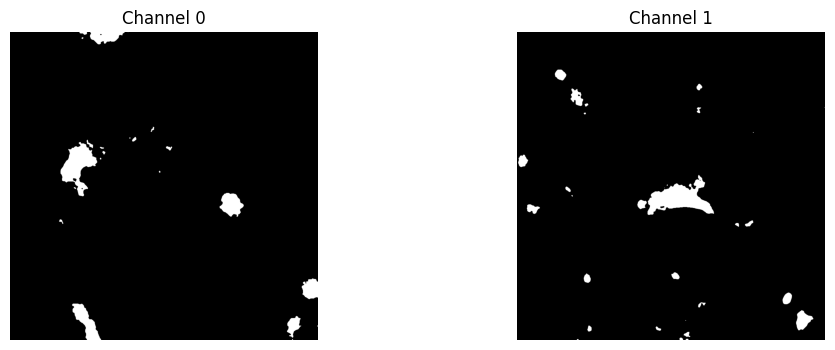

Layer 28


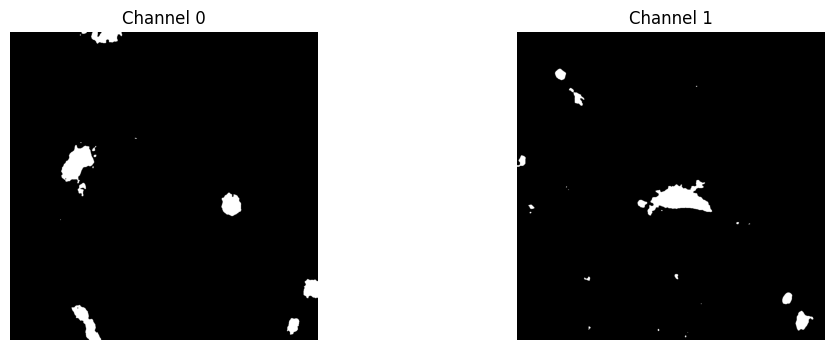

Layer 29


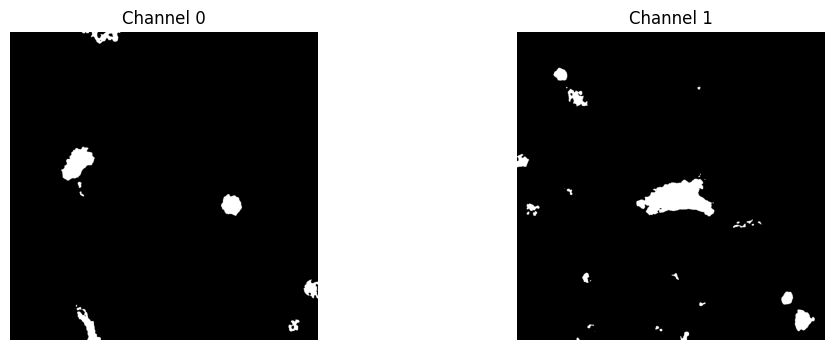

In [6]:
# filepath = "D:\\astrocytes\\астроциты_новые_данные\\Lipachev_astrocytes_2021.03.03\\2021.03.03_1.2.3_Image 3.czi"
filepath = 'D:\\astrocytes\\Астроциты контроль-эпилепсия\\Контроль\\Архив\\2022.04.30_2ch_1.1_Image 1.czi'

# open the CZI document to read the
with pyczi.open_czi(filepath) as czidoc:
    # print(type(czidoc))
    # print('\n'.join(dir(pyczi.CziReader)))
    # print(czidoc.metadata)
    print(czidoc.total_bounding_box)
    z_layers = czidoc.total_bounding_box["Z"][1]
    channels = czidoc.total_bounding_box["C"][1]
    print(z_layers)
    for z in range(z_layers):
        print(f"Layer {z}")
        # ch0 = czidoc.read(plane={"T": 0, "Z": z, "C": 0})
        # ch1 = czidoc.read(plane={"T": 0, "Z": z, "C": 1})
        # fig, axs = plt.subplots(1, 2, figsize=(5, 2.5))  # 1 row, 2 columns
        # # Display the first image on the left
        # axs[0].imshow(ch0)
        # axs[0].set_title('Channel 0')
        # # Display the second image on the right
        # axs[1].imshow(ch1)
        # axs[1].set_title('Channel 1')
        # plt.show()
        plt.figure(figsize=(12, 4))
        for i in range(channels):
            ch = czidoc.read(plane={"T": 0, "Z": z, "C": i})
            ch = (ch.astype('float32')/np.max(ch) * 255).astype('uint8')
            # print(ch)
            ch = cv2.equalizeHist(ch)
            ch2 = ch.copy()
            # ch2 = morphology.remove_small_objects(ch2, min_size=2)
            # ch2 = ch2.astype('uint8')*255
            # ch2 = morphology.remove_small_holes(ch2, area_threshold=2)
            # ch2 = ch2.astype('uint8')*255
            # ch2 = cv2.GaussianBlur(ch2,(5,5),0)
            ch2 = cv2.medianBlur(ch2, 9)
            ch2 = cv2.GaussianBlur(ch2, (9, 9), 0)
            th, bn = cv2.threshold(ch2, 200, 255, cv2.THRESH_BINARY)
            # print(th)

            noise_removal_threshold = 25
            contours, hierarchy = cv2.findContours(ch2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            mask = np.zeros_like(ch2)
            for contour in contours:
                area = cv2.contourArea(contour)
                if area > noise_removal_threshold:
                    cv2.fillPoly(mask, [contour], 255)
            
            plt.subplot(1, channels, i + 1)
            plt.imshow(bn, cmap='gray')
            plt.axis('off')
            plt.title(f"Channel {i}")
        plt.show()